In [73]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, precision_score, recall_score,f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tqdm import tqdm
from sklearn.tree import plot_tree

In [74]:
heart_df=pd.read_csv("/content/heart.csv")
heart_df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [75]:
heart_df.head()
heart_df = pd.get_dummies(heart_df, drop_first=True)

In [76]:
X = heart_df.drop('HeartDisease', axis=1)
y = heart_df['HeartDisease']

In [77]:
X, y = heart_df.drop(['HeartDisease'], axis=1), heart_df['HeartDisease']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [79]:
print(heart_df.head())

   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0   True               True              False             False   
1  False              False               True             False   
2   True               True              False             False   
3  False              False              False             False   
4   True              False               True             False   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0               True          False             False          False

###Testing with LogisticRegression Model accuracy score

In [80]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1])

In [81]:
y_test.values

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [82]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[109,  20],
       [ 16, 131]])

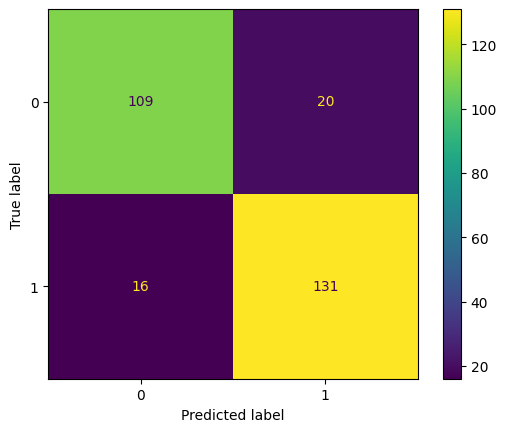

In [83]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [84]:
accuracy_score(y_test, y_pred)

0.8695652173913043

In [85]:
lr = LogisticRegression(penalty=None, solver='saga')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0])

Coefficients and Intercepts:

In [86]:
lr = LogisticRegression(penalty=None, solver='saga')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0])

In [87]:
lr.coef_, lr.intercept_

(array([[ 0.05065892,  0.00686351, -0.00347661,  0.01131746, -0.01974601,
          0.05424818,  0.01290345, -0.01674292, -0.01314123, -0.00086089,
         -0.00550659,  0.00135032,  0.027405  ,  0.03426369, -0.03644524]]),
 array([0.00125531]))

In [88]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 91,  38],
       [ 30, 117]])

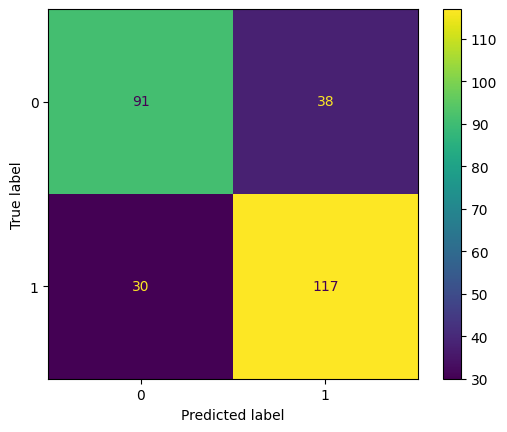

In [89]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [90]:
accuracy_score(y_test, y_pred)

0.7536231884057971

#### Hyper-Parameter Tuning
Try for different values of `penalty` for same `solver='saga'`

In [ ]:
penalties = ['l1','l2','elasticnet',None]
Cs = np.linspace(0.001, 20, 25)
scores = []
for p in penalties:
    for c in Cs:
        lr = LogisticRegression(penalty=p, solver='saga', l1_ratio=0.5, C=c)
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        scores.append([p,c, accuracy_score(y_test, y_pred)])

In [92]:
df_scores = pd.DataFrame(scores, columns=['penalty','C','score'])
print("Best alpha and score:\n",df_scores.sort_values('score', ascending=False).iloc[0])

Best alpha and score:
 penalty          l1
C          0.834292
score      0.753623
Name: 1, dtype: object


###Logistic Regression (with scaler and hyperparameter tuning)

In [93]:
#scaler = StandardScaler().set_output(transform='pandas')
scaler = MinMaxScaler().set_output(transform='pandas')
X_trn_scl = scaler.fit_transform(X_train)
X_tst_scl = scaler.transform(X_test)

In [94]:
svm = SVC(kernel='linear')
svm.fit(X_trn_scl, y_train)
y_pred = svm.predict(X_tst_scl)

In [95]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[108,  21],
       [ 17, 130]])

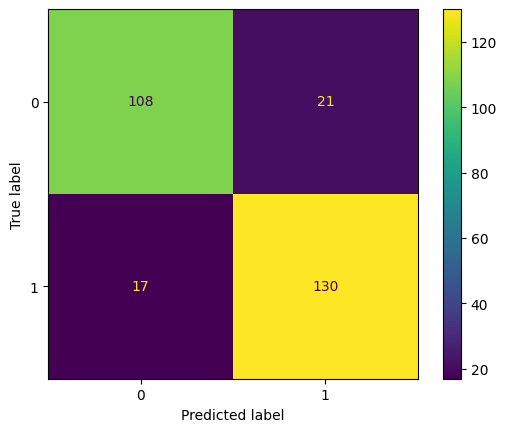

In [96]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [97]:
accuracy_score(y_test, y_pred)

0.8623188405797102

HYperparameter Tuning

In [98]:
Cs = np.linspace(0.001, 10, 25)
len(Cs)

25

In [99]:
scores = []
for i in tqdm(range(len(Cs))):
    svm = SVC(kernel='linear', C=Cs[i])
    svm.fit(X_trn_scl, y_train)
    y_pred = svm.predict(X_tst_scl)
    scores.append([Cs[i], accuracy_score(y_test, y_pred)])

100%|██████████| 25/25 [00:00<00:00, 55.28it/s]


In [100]:
df_scores = pd.DataFrame(scores, columns=['C','score'])
print("Best C and score:\n",df_scores.sort_values('score', ascending=False).iloc[0])

Best C and score:
 C        4.583875
score    0.862319
Name: 11, dtype: float64


In [101]:
df_scores

,C,score
0,0.001000,0.532609
1,0.417625,0.851449
2,0.834250,0.855072
3,1.250875,0.858696
4,1.667500,0.855072
5,2.084125,0.855072
6,2.500750,0.858696
7,2.917375,0.858696
8,3.334000,0.858696
9,3.750625,0.858696


###Testing with (DTC) Decision Tree Classifier Model accuracy score

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25, stratify=y)

In [103]:
dtc = DecisionTreeClassifier(random_state=25)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=25)

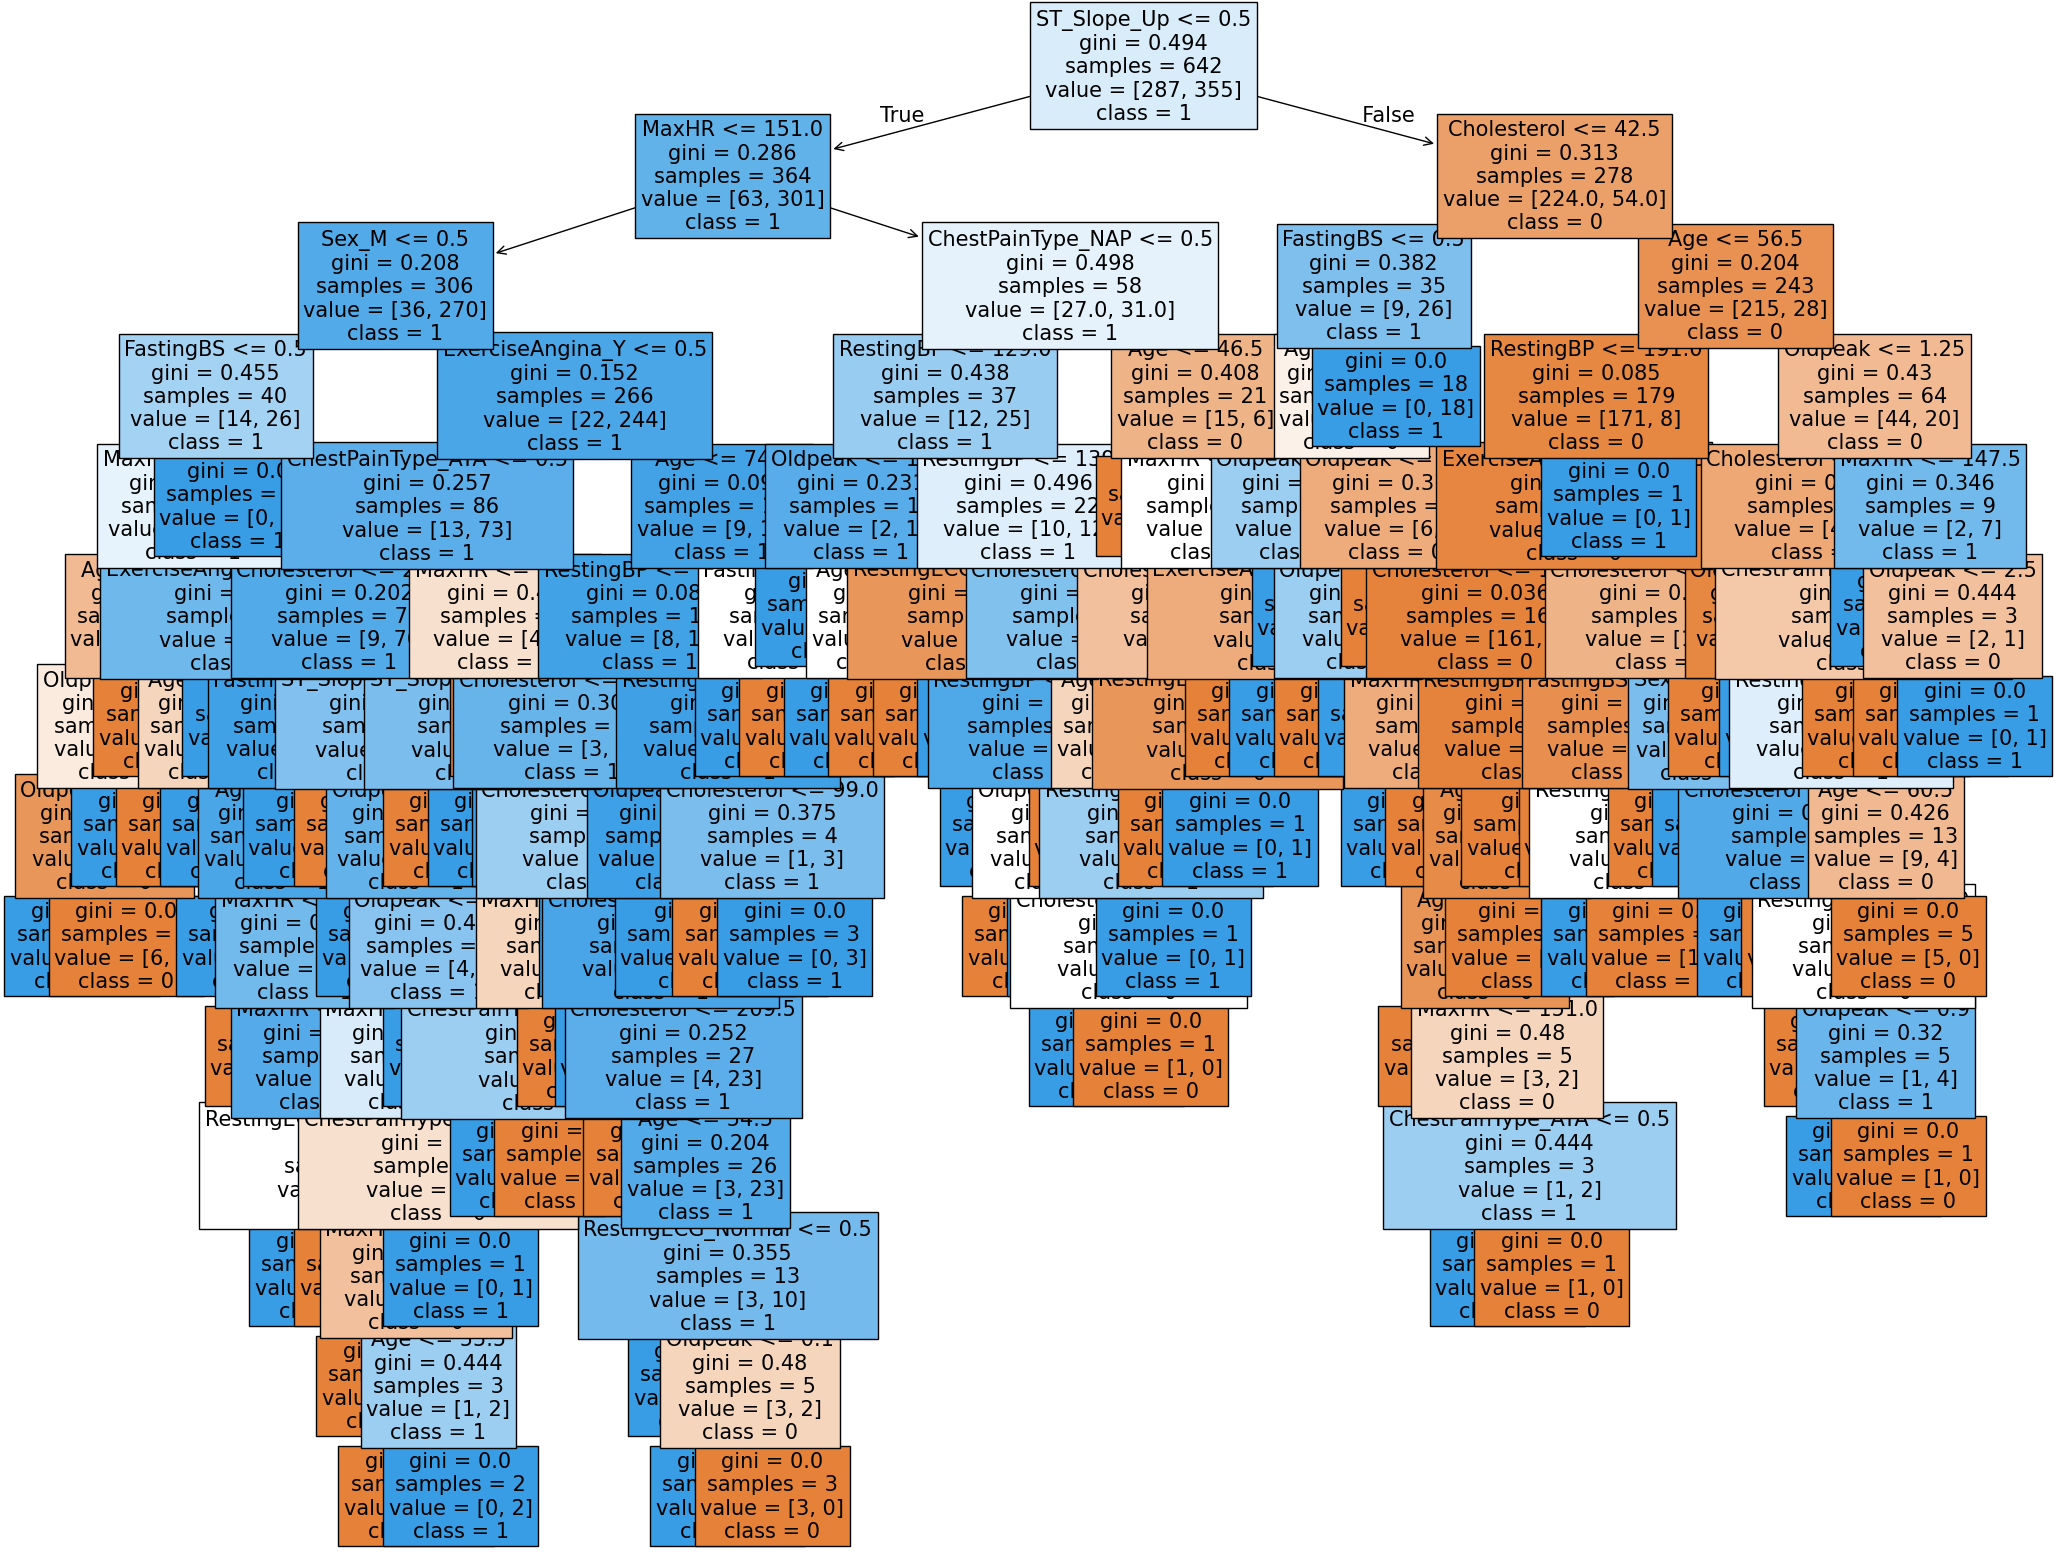

In [104]:
plt.figure(figsize=(25,20))
plot_tree(dtc,feature_names=list(X.columns), class_names=['0','1'],  filled=True,fontsize=15)
plt.show()

In [105]:
y_pred = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7934782608695652


In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       123
           1       0.84      0.77      0.81       153

    accuracy                           0.79       276
   macro avg       0.79      0.80      0.79       276
weighted avg       0.80      0.79      0.79       276



In [107]:
print(" For Logistic regression Model")
print("-"*50)
cdf=pd.DataFrame(confusion_matrix(y_test,y_pred),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision-", precision_score(y_test,y_pred))
print("Recall -", recall_score(y_test,y_pred))
print("F1 score -", f1_score(y_test,y_pred))




 For Logistic regression Model
--------------------------------------------------
     0    1
0  101   22
1   35  118
--------------------------------------------------
Precision- 0.8428571428571429
Recall - 0.7712418300653595
F1 score - 0.8054607508532423


###GaussianNB

In [108]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
cm = confusion_matrix (y_test, y_pred)

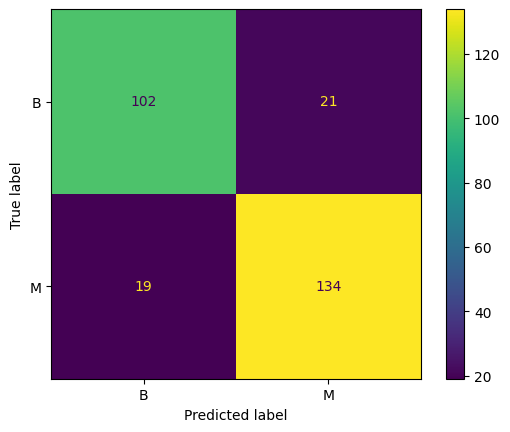

In [109]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['B','M'])
disp.plot()
plt.show()

In [110]:
accuracy_score(y_test, y_pred)

0.855072463768116

In [114]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.83      0.84       123
           1       0.86      0.88      0.87       153

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.86      0.85       276



###BernoulliNB

In [111]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
cm = confusion_matrix (y_test, y_pred)

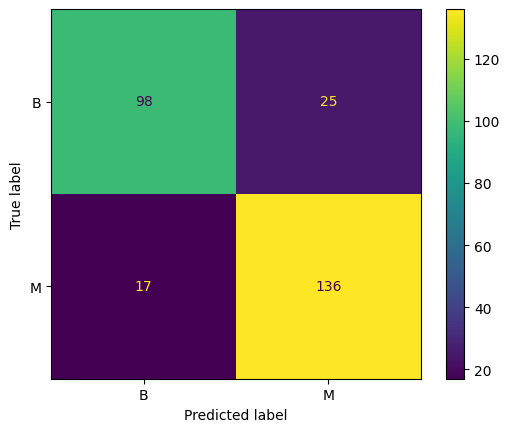

In [112]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['B','M'])
disp.plot()
plt.show()

In [113]:
accuracy_score(y_test, y_pred)

0.8478260869565217

###Best Model:
Logistic Regression with Scaler and Hyperparameter Tuning performs the best with an accuracy of 0.862, which is higher than all other models listed. GaussianNB slightly edges out with the highest F1 score.
